## Business Problem

- Valuable Employee Attrition from Company ABC

### Based on the problem understanding I have two goals to target:

- Firstly, understanding why Company ABC's best and most experienced employees leaving prematurely? 
- Secondly, try to predict which/who valuable employees will leave next.


A litle bit about the dataset:

Fields in the dataset include:
- Job Satisfaction
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

##### This is a Binary Class Classification Problem
- There couple of common evaluation metrics for Classification model
- Accuracy
- Balanced Accuracy
- Precision
- Recall
- F1 Score

#### But here in this case/problem I will be choosing F1-Score and Recall as the evaluation metric for the models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")


np.random.seed(123)

## [1] Loading Dataset

In [2]:
# Loading from the local
data = pd.read_csv('E:\Data Science\Take Home\Applied Mat\HR_comma_sep.csv')

data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


## [2] Exploratory Data Analysis

### [2.1] Data Description/Understanding

In [3]:
data.describe()
#add class distribution for left
#add box plots

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Summary
- There are total 14999 unique data points in the dataset.
- Overall satisfaction level of the given employees is 61%.
- Performance average is around 71%.
- Average number of projects handled by the employees is 3.8
- Monthly active hours is around 200 hrs and average work experience of the employees with the company is around 3.5 years.
- The attrition rate is around 24%.

#### [2.1.1] Exploring  features statistics

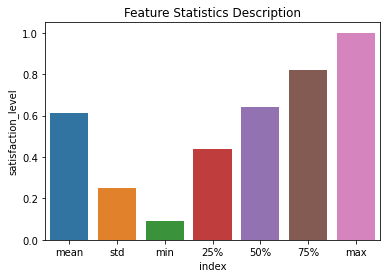

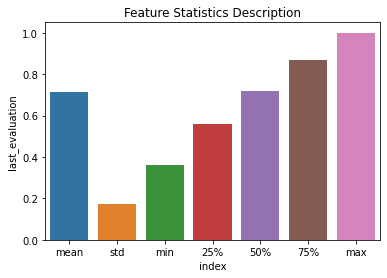

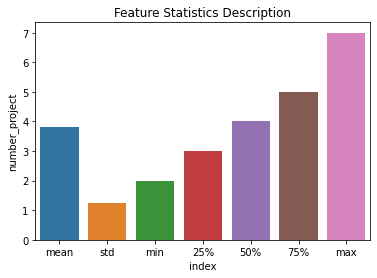

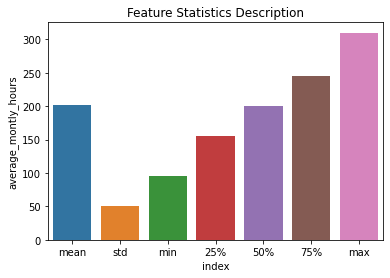

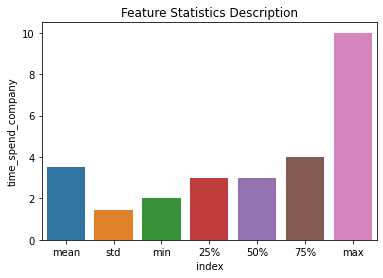

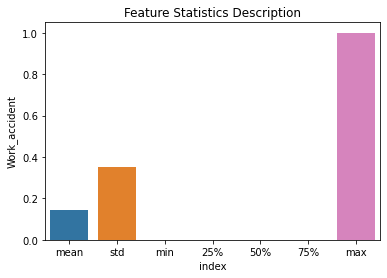

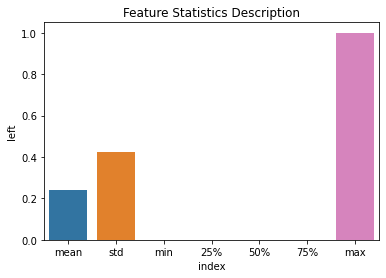

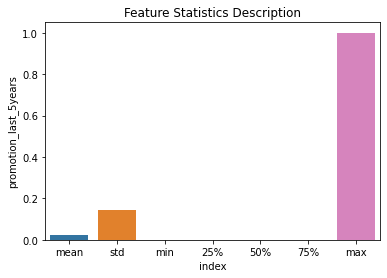

In [4]:
# plotting the data statistics/descriptions

data_desc = data.describe()
num_col = data._get_numeric_data().columns


data_desc.reset_index(inplace=True)
data_desc = data_desc[data_desc['index'] != 'count']

plt.title('Feature Statistics Description')
for i in num_col:
    if i in ['index']:
        continue
    sns.barplot(x="index", y=i, data=data_desc)
    plt.title('Feature Statistics Description')
    plt.show()

### [2.1.2] Class Distribution

In [5]:
# class distribution
print('Employee Retention/Attrition Distribution')
display(pd.DataFrame(data.groupby('left').size()).T.style.hide_index())

print('0 - Retention\n1 - Attrition')

Employee Retention/Attrition Distribution


0,1
11428,3571


0 - Retention
1 - Attrition


### [2.1.3] Box and Whiskers Plots - Univariate Analysis

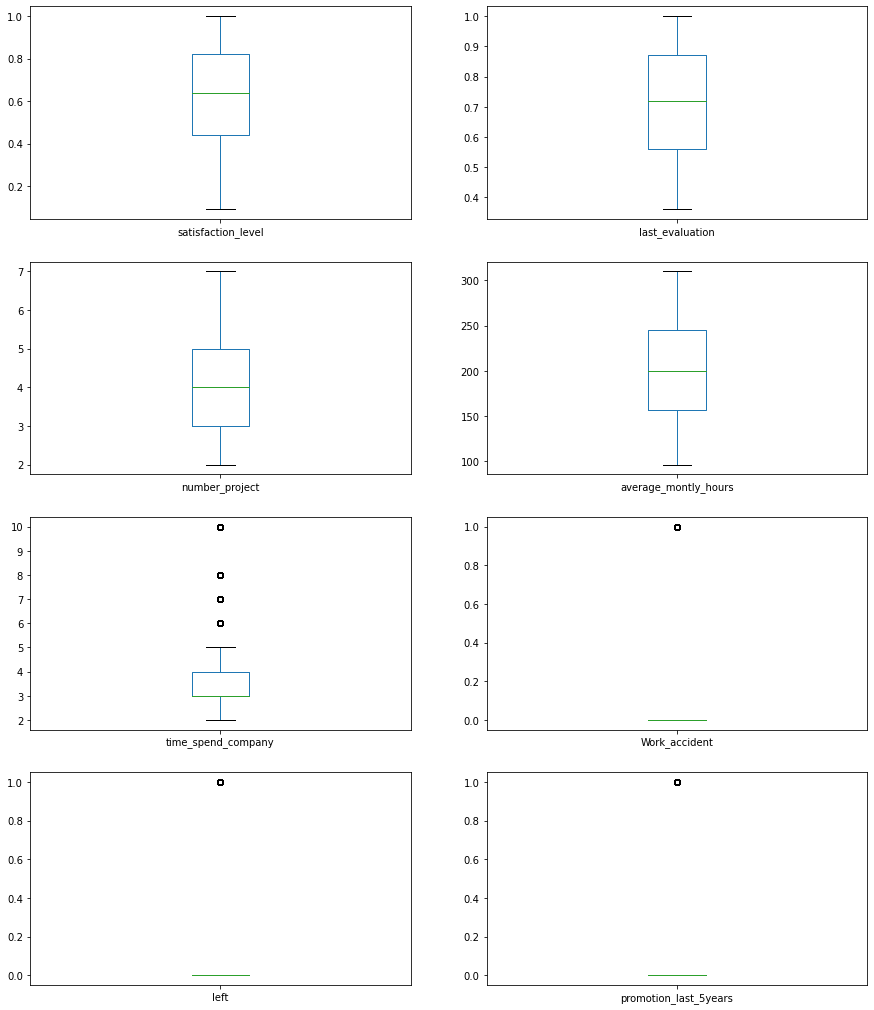

In [6]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize=(15,18))
plt.show()

### [2.2] Correlation Matrix

Text(0.5, 1.0, 'Correlation Coefficients')

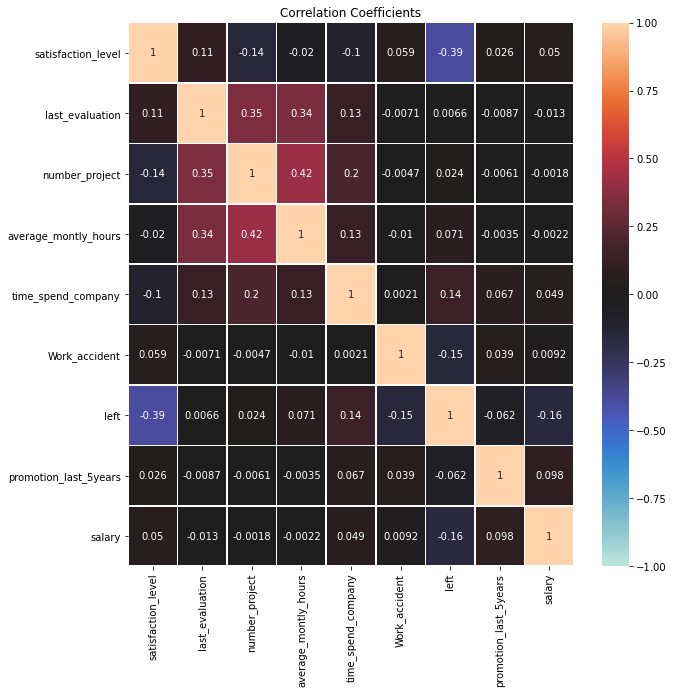

In [7]:
# Let's start the visualization by having a look at the correlation coefficients

data_corr = data.copy()
# mapping categorical salaries to ordinal numerical values

map_salary = {'low': 0, 'medium': 1, 'high': 2} 
data_corr.replace({'salary': map_salary}, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(data=data_corr.drop('department', axis=1).corr(), annot=True,vmin=-1, vmax=1,center=0,linewidths=.5) 
plt.title('Correlation Coefficients')

##### Based on the correlation matrix - it can be infered from it:
- Satisfaction level, Work accident, Promotion_last_5years and Salary are negatively correlated to the target variable i.e. left.

- Where as number of projects, evaluation result, average monthly working hours and number of years at the company are positively correlated to the target variable.

- This suggests that having lower satisfation level or facing any kind of accident at work place or not being promoted in the last 5 years or having lower salary or number of years spent at the company indicates towards employee churn or leaving the organization

**To study more about each variable with respect to the employee Attrition (target variable) I will go deeper into analysing each feature and its affect**

### [2.3] Understanding the Pair-Plots of the Features and Target Variable

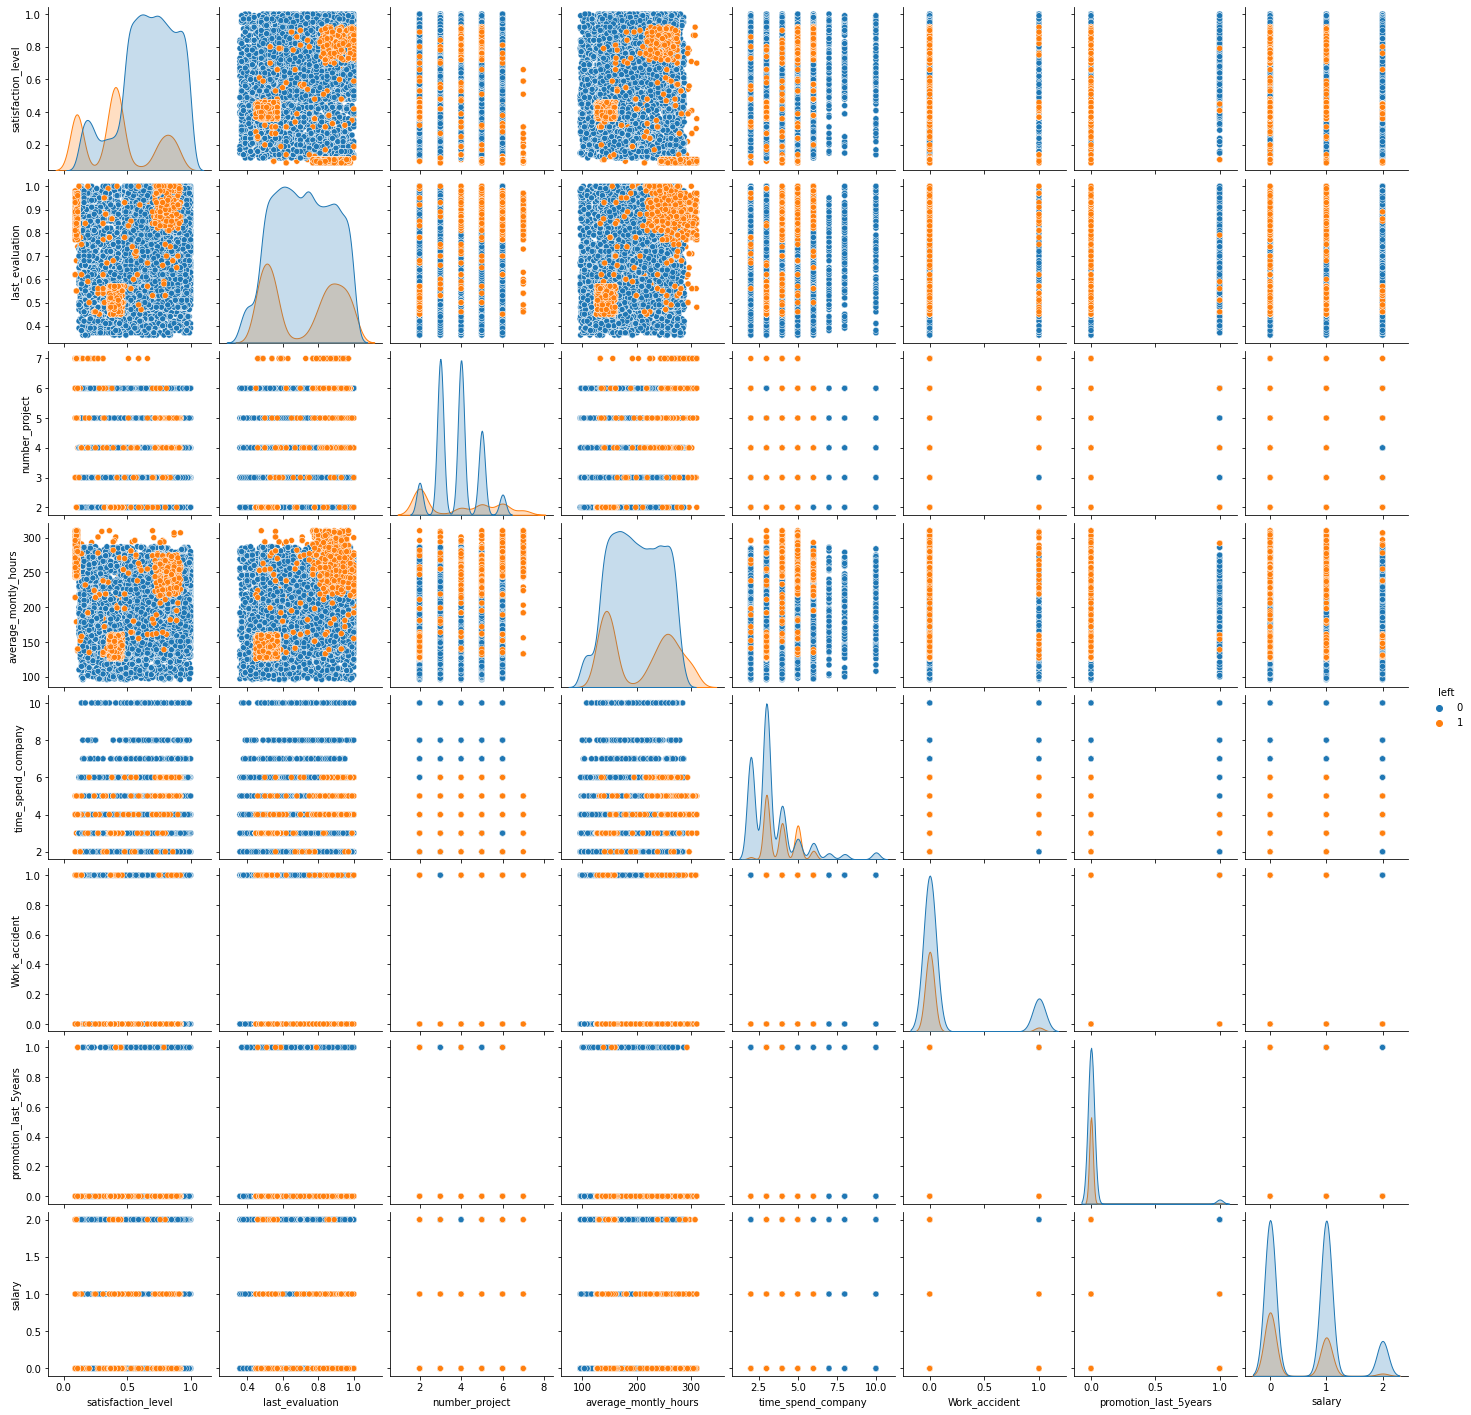

In [8]:
# Pair plot
sns.pairplot(data_corr,hue='left')

### [2.3.1] Understanding Satisfaction Level feature

Text(0.5, 1.0, 'Satisfaction Level Density Overall (Hue = left)')

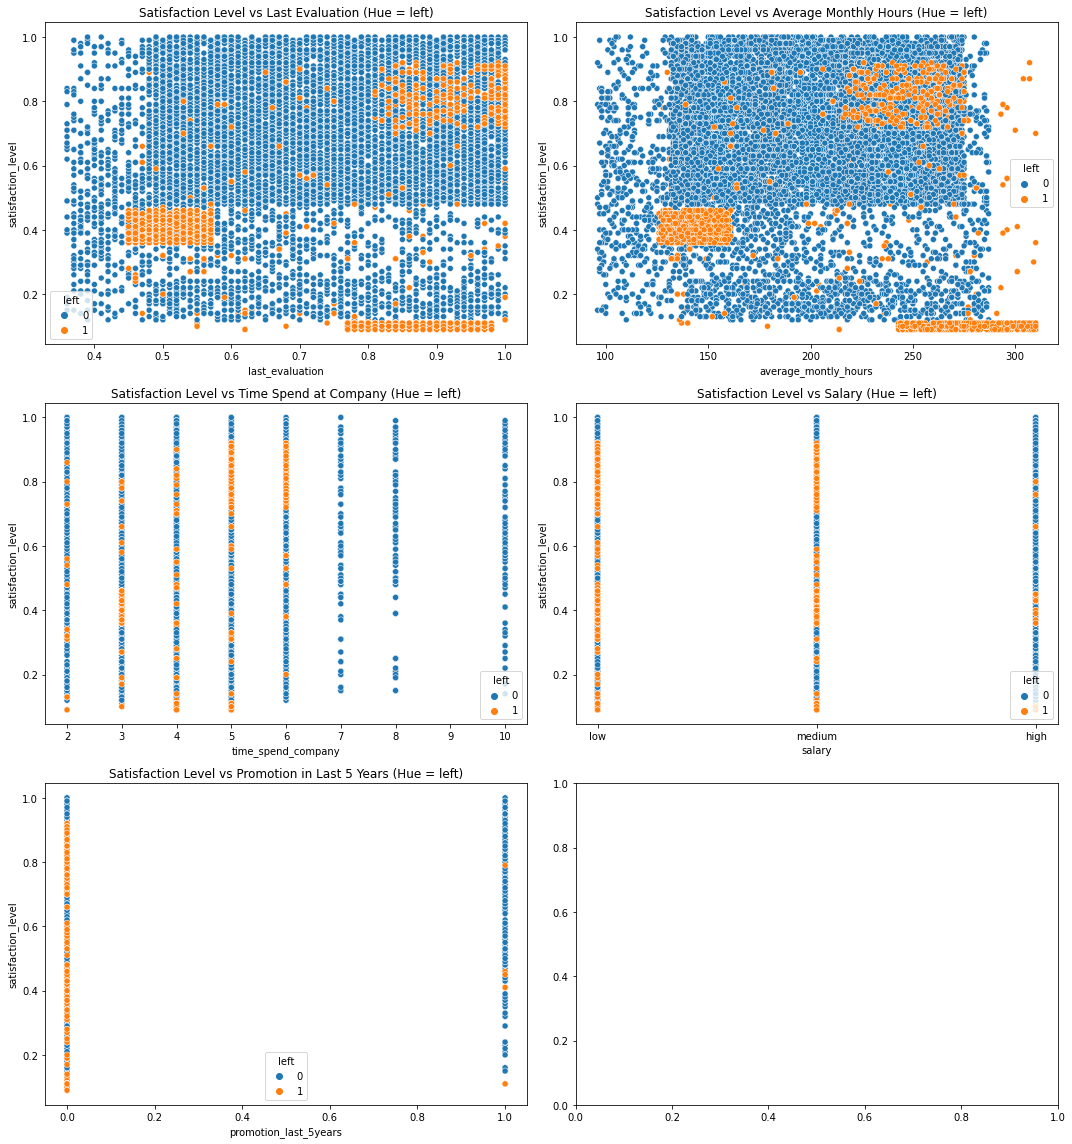

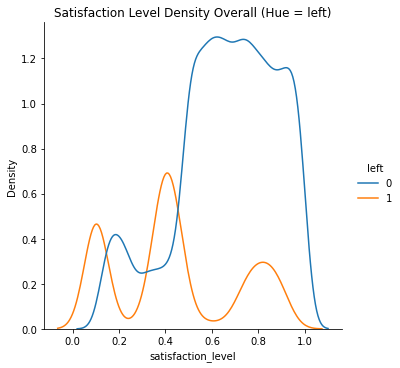

In [9]:

#data_corr['promotion_last_5years'] = data_corr['promotion_last_5years'].astype(object)

fig, ax = plt.subplots(nrows = 3, ncols=2, figsize=(15,16))

sns.scatterplot(x='last_evaluation', y = 'satisfaction_level', hue='left', data=data,ax=ax[0,0])
ax[0,0].set_title('Satisfaction Level vs Last Evaluation (Hue = left)')

sns.scatterplot(x='average_montly_hours', y = 'satisfaction_level', hue='left', data=data,ax=ax[0,1])
ax[0,1].set_title('Satisfaction Level vs Average Monthly Hours (Hue = left)')

sns.scatterplot(x='time_spend_company', y = 'satisfaction_level', hue='left', data=data,ax=ax[1,0])
ax[1,0].set_title('Satisfaction Level vs Time Spend at Company (Hue = left)')

sns.scatterplot(x='salary', y = 'satisfaction_level', hue='left', data=data,ax=ax[1,1])
ax[1,1].set_title('Satisfaction Level vs Salary (Hue = left)')

sns.scatterplot(x='promotion_last_5years', y = 'satisfaction_level', hue='left', data=data,ax=ax[2,0])
ax[2,0].set_title('Satisfaction Level vs Promotion in Last 5 Years (Hue = left)')

plt.tight_layout()

sns.displot(data=data, x= 'satisfaction_level' ,kind='kde',hue='left')
plt.title('Satisfaction Level Density Overall (Hue = left)')

In [10]:
high_sat_eval = sqldf("""select count(*) as cnt from data where last_evaluation>0.75 and satisfaction_level>0.6 and left=1""")

low_sat_eval = sqldf("""select count(*) as cnt from data where last_evaluation<0.6 and satisfaction_level<0.25 and left=1""")

high_sat_hrs = sqldf("""select count(*) as cnt from data where average_montly_hours>200 and left=1""")

yrs_comp = sqldf("""select count(*) as cnt from data where time_spend_company<=6 and satisfaction_level>0.6 and left=1""")

low_med_sal = sqldf("""select count(*) as cnt from data where (salary = 'low' or salary = 'medium') and satisfaction_level>0.6 and left=1""")

promo_5yr = sqldf("""select count(*) as cnt from data where promotion_last_5years=0 and satisfaction_level>0.6 and left=1""")

print('Summary')
print('- There are around: %.2f' % (high_sat_eval['cnt'].values[0]*100/len(data)),'% \
employees attrition rate with higher satisfaction and higher last evaluation result.')

print('- There are around: %.2f' % (low_sat_eval['cnt'].values[0]*100/len(data)),'% \
employees attrition rate with lower satisfaction and lower last evaluation result.')

print('- There are around: %.2f' % (high_sat_hrs['cnt'].values[0]*100/len(data)),'% \
employees attrition rate with high work satisfaction and who are working morethan 200 Hrs a month.')

print('- There are around: %.2f' % (yrs_comp['cnt'].values[0]*100/len(data)),'% \
employees attrition rate having high work satisfaction and have been with organization grater than 2 \n  but less than 6 years.')

print('- There are around: %.2f' % (low_med_sal['cnt'].values[0]*100/len(data)),'% \
employees attrition rate having high work satisfaction and in the range of low to medium salary \n  range.')

print('- There are around: %.2f' % (promo_5yr['cnt'].values[0]*100/len(data)),'% \
employees attrition rate having high work satisfaction but did not receive any promotions in the \n  last 5 years.')

#explain density plot

Summary
- There are around: 6.08 % employees attrition rate with higher satisfaction and higher last evaluation result.
- There are around: 0.11 % employees attrition rate with lower satisfaction and lower last evaluation result.
- There are around: 12.77 % employees attrition rate with high work satisfaction and who are working morethan 200 Hrs a month.
- There are around: 6.47 % employees attrition rate having high work satisfaction and have been with organization grater than 2 
  but less than 6 years.
- There are around: 6.35 % employees attrition rate having high work satisfaction and in the range of low to medium salary 
  range.
- There are around: 6.45 % employees attrition rate having high work satisfaction but did not receive any promotions in the 
  last 5 years.


### [2.3.2] Understanding Last Evaluation feature

Text(0.5, 1.0, 'Last Evaluation Density Overall (Hue = left)')

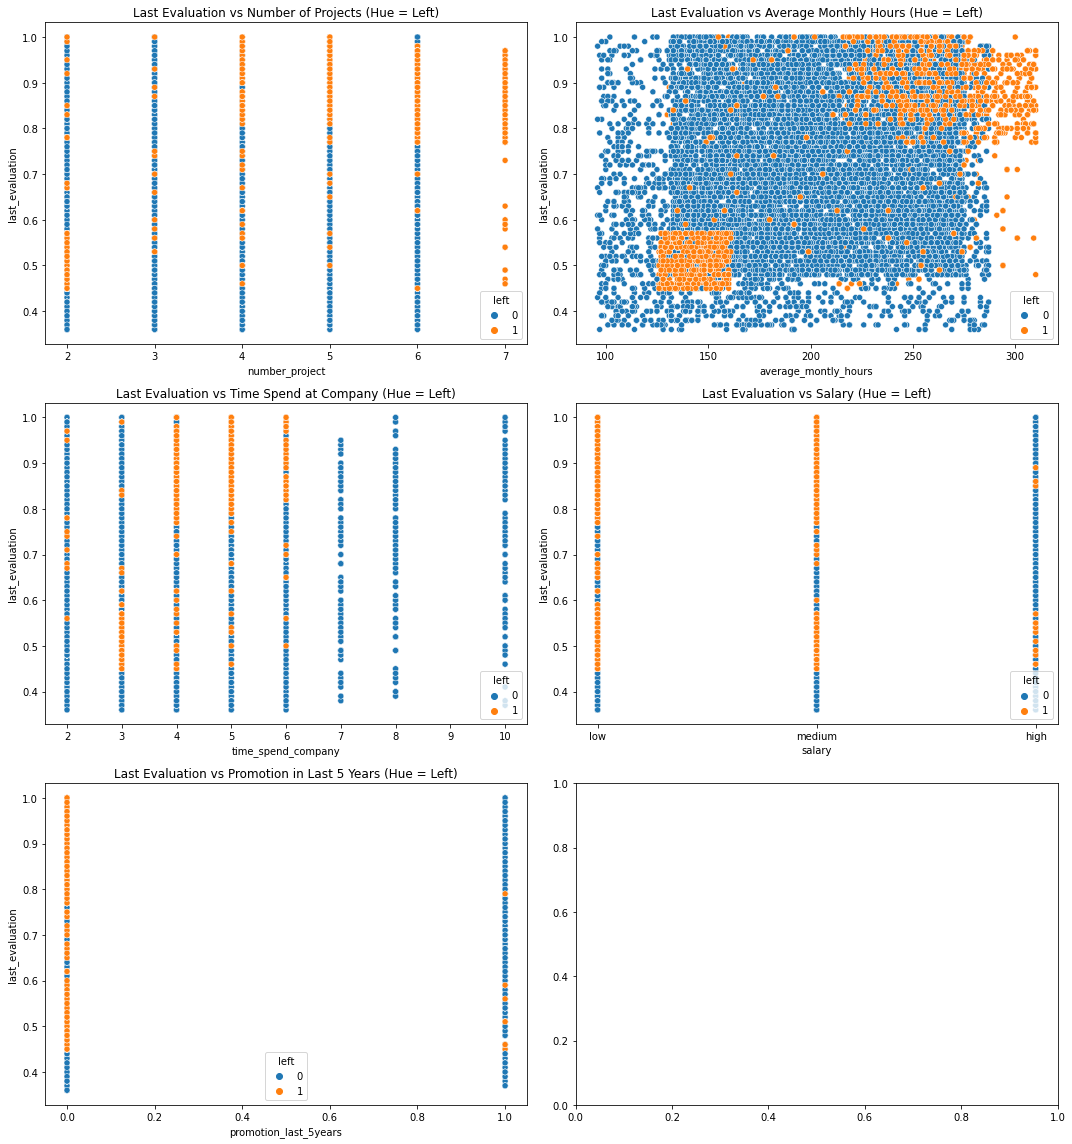

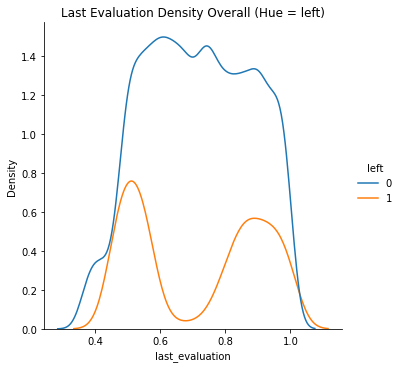

In [11]:
fig, ax = plt.subplots(nrows = 3, ncols=2, figsize=(15,16))

sns.scatterplot(x='number_project', y = 'last_evaluation', hue='left', data=data,ax=ax[0,0])
ax[0,0].set_title('Last Evaluation vs Number of Projects (Hue = Left)')

sns.scatterplot(x='average_montly_hours', y = 'last_evaluation', hue='left', data=data,ax=ax[0,1])
ax[0,1].set_title('Last Evaluation vs Average Monthly Hours (Hue = Left)')

sns.scatterplot(x='time_spend_company', y = 'last_evaluation', hue='left', data=data,ax=ax[1,0])
ax[1,0].set_title('Last Evaluation vs Time Spend at Company (Hue = Left)')

sns.scatterplot(x='salary', y = 'last_evaluation', hue='left', data=data,ax=ax[1,1])
ax[1,1].set_title('Last Evaluation vs Salary (Hue = Left)')

sns.scatterplot(x='promotion_last_5years', y = 'last_evaluation', hue='left', data=data,ax=ax[2,0])
ax[2,0].set_title('Last Evaluation vs Promotion in Last 5 Years (Hue = Left)')

plt.tight_layout()

sns.displot(data=data, x= 'last_evaluation' ,kind='kde',hue='left')
plt.title('Last Evaluation Density Overall (Hue = left)')

### [2.3.3] Understanding Average Monthly Hours feature

Text(0.5, 1.0, 'Average Monthly Hours Density Overall (Hue = left)')

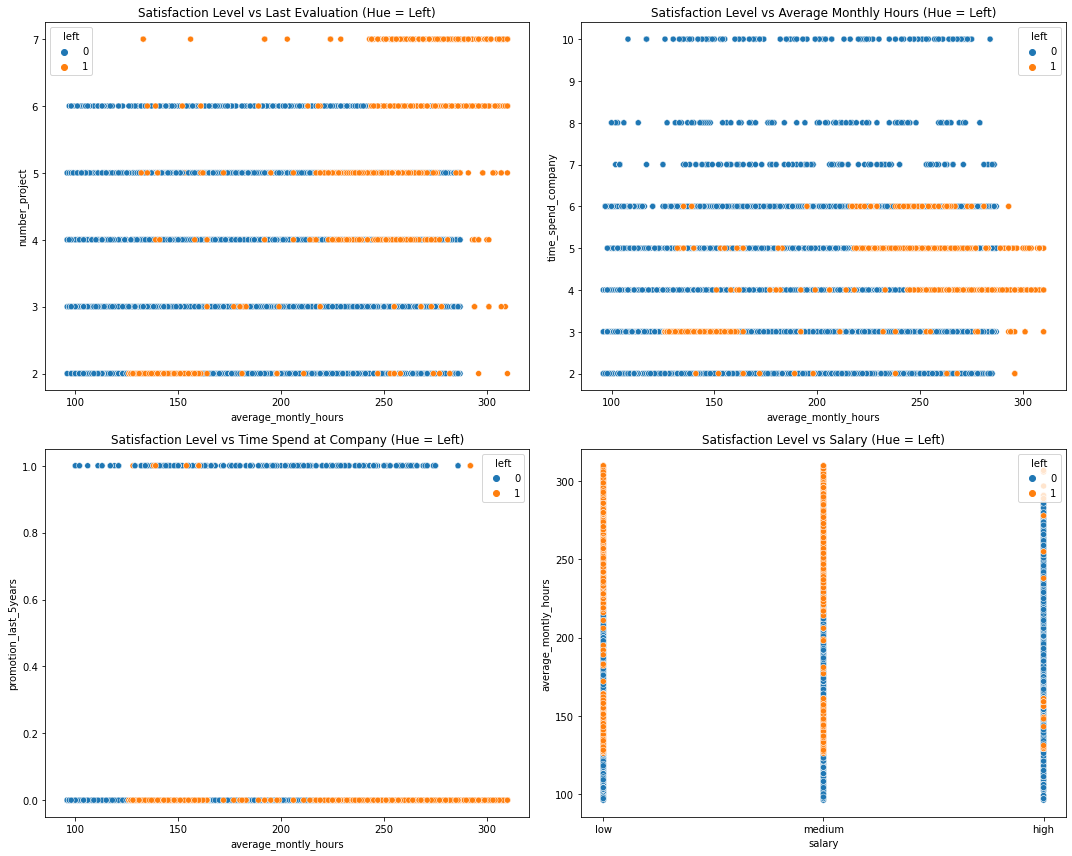

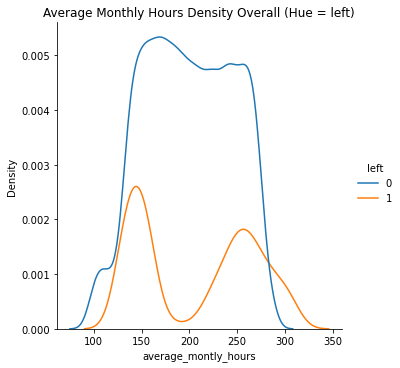

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(15,12))

sns.scatterplot(x='average_montly_hours', y = 'number_project', hue='left', data=data,ax=ax[0,0])
ax[0,0].set_title('Satisfaction Level vs Last Evaluation (Hue = Left)')

sns.scatterplot(x='average_montly_hours', y = 'time_spend_company', hue='left', data=data,ax=ax[0,1])
ax[0,1].set_title('Satisfaction Level vs Average Monthly Hours (Hue = Left)')

sns.scatterplot(x='average_montly_hours', y = 'promotion_last_5years', hue='left', data=data,ax=ax[1,0])
ax[1,0].set_title('Satisfaction Level vs Time Spend at Company (Hue = Left)')

sns.scatterplot(x='salary', y = 'average_montly_hours', hue='left', data=data,ax=ax[1,1])
ax[1,1].set_title('Satisfaction Level vs Salary (Hue = Left)')

plt.tight_layout()

sns.displot(data=data, x= 'average_montly_hours' ,kind='kde',hue='left')
plt.title('Average Monthly Hours Density Overall (Hue = left)')

### [2.3.4] Understanding Department feature

<AxesSubplot:xlabel='department', ylabel='Count'>

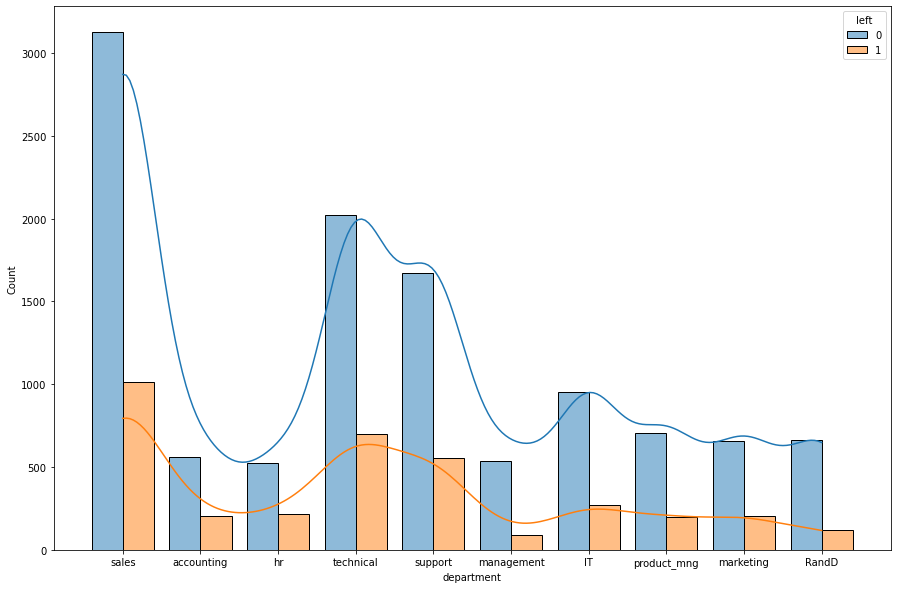

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(data=data,x='department', hue='left',multiple="dodge",kde=True,stat='count',shrink=.8)


#percentage level

### [2.3.5] Understanding Work Accident feature

<AxesSubplot:xlabel='department', ylabel='Count'>

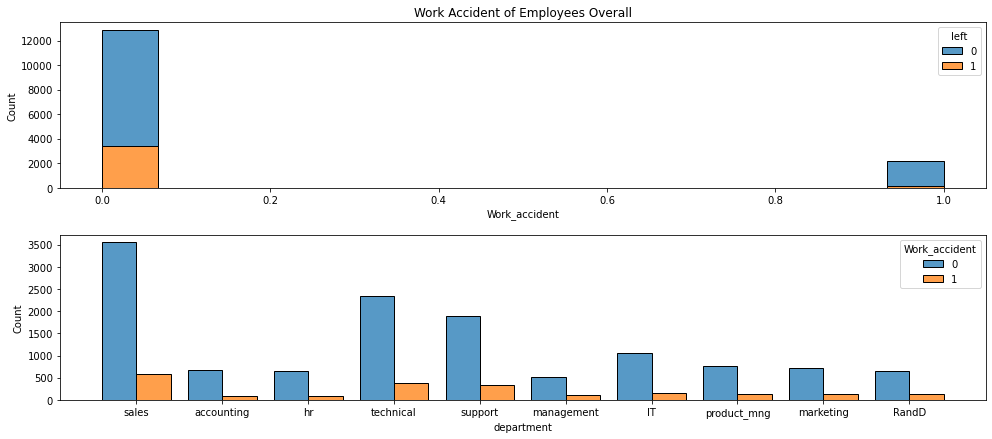

In [14]:
#Let's have a look at the distribution of work accident for different groups of employees


fig, (ax) = plt.subplots(nrows = 2,ncols=1, figsize=(14,6))

sns.histplot(data, x = 'Work_accident',hue = 'left', multiple="stack",ax=ax[0])
ax[0].set_title('Work Accident of Employees Overall')


# sns.countplot(df_hr_left['Work_accident'], ax=ax2)
# ax2.set_title('Work Accident of Employees Left')

# sns.countplot(df_hr_not_left['Work_accident'], ax=ax3)
# ax3.set_title('Work Accident of Employees who did not Leave')

plt.tight_layout()

sns.histplot(data=data,x='department', hue='Work_accident',multiple='dodge',shrink=0.8)

In [15]:
# plt.figure(figsize=(15,10))
# sns.histplot(data=data,x='department', hue='Work_accident',multiple='dodge', shrink=.8)

### [2.3.6] Understanding Promotion in Last 5 Years feature

Text(0.5, 1.0, 'Last 5 Year Promotion Density Plot Overall (Hue = left)')

<Figure size 1080x720 with 0 Axes>

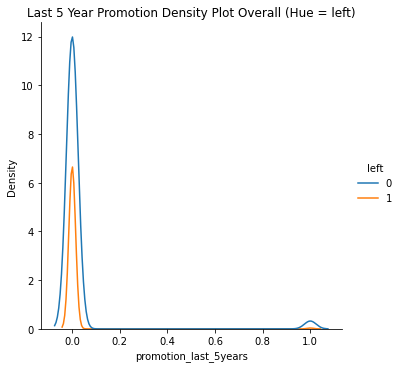

In [16]:
plt.figure(figsize=(15,10))
sns.displot(data=data, x= 'promotion_last_5years', kind='kde', hue='left')
plt.title('Last 5 Year Promotion Density Plot Overall (Hue = left)')


### [2.3.7] Analysis of Valuable Employees Attrition
- Who are these valuable employees?
- Valueable employees are those employees who have last evaluation score greater than the overall average score i.e. > 71%

In [17]:
#data slicing based on the identification of valued employee who left the Company ABC
data_val_emp = data.loc[(data['last_evaluation'] > data['last_evaluation'].mean()) & (data['left'] == 1)]

print(f'The percentage of High Valued employees out of total employees who \
left from the ABC Company:',round(100*((len(data_val_emp)/(len(data[data['left'] == 1])))),2),"%")

The percentage of High Valued employees out of total employees who left from the ABC Company: 53.01 %


In [18]:
data_val_emp.shape

(1893, 10)

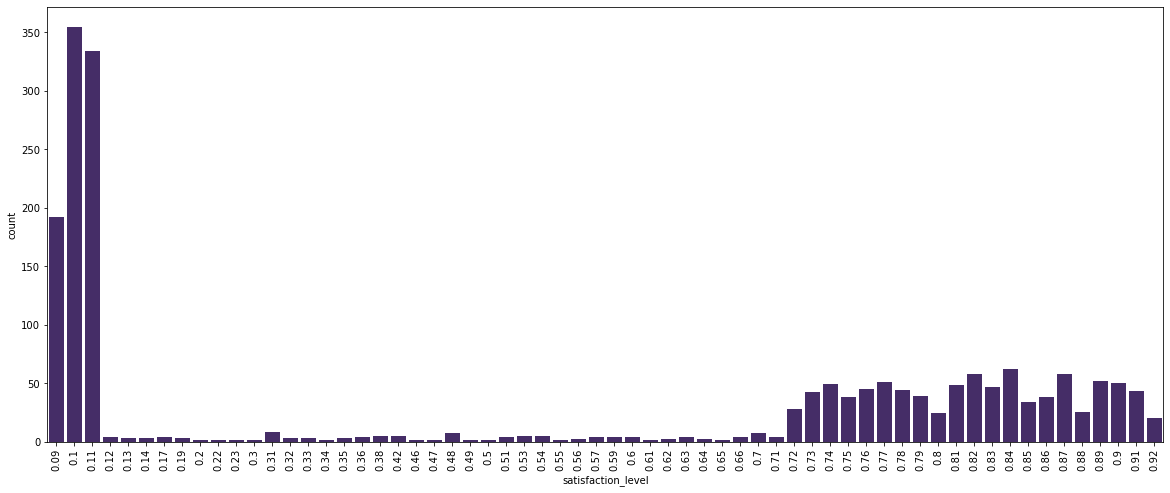

In [19]:
# satisfaction level for the highly valued emps who left
plt.figure(figsize=(20,8))
sns.countplot(data=data_val_emp,x='satisfaction_level',palette=['#432371'])
plt.xticks(rotation=90)
plt.show() #one c

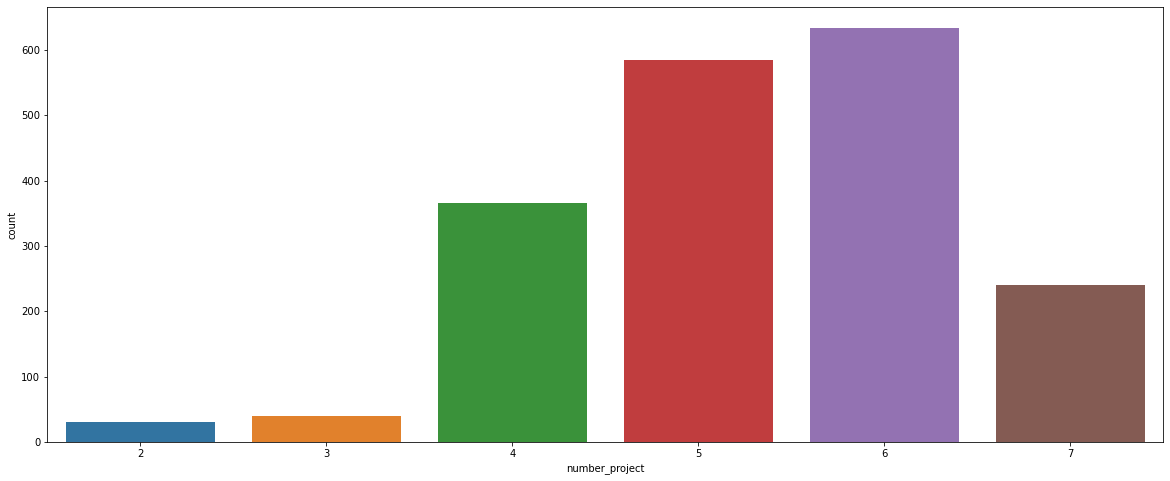

In [20]:
# No of project handled by the highly valued emps that left
plt.figure(figsize=(20,8))
sns.countplot(data=data_val_emp,x='number_project')
plt.show()

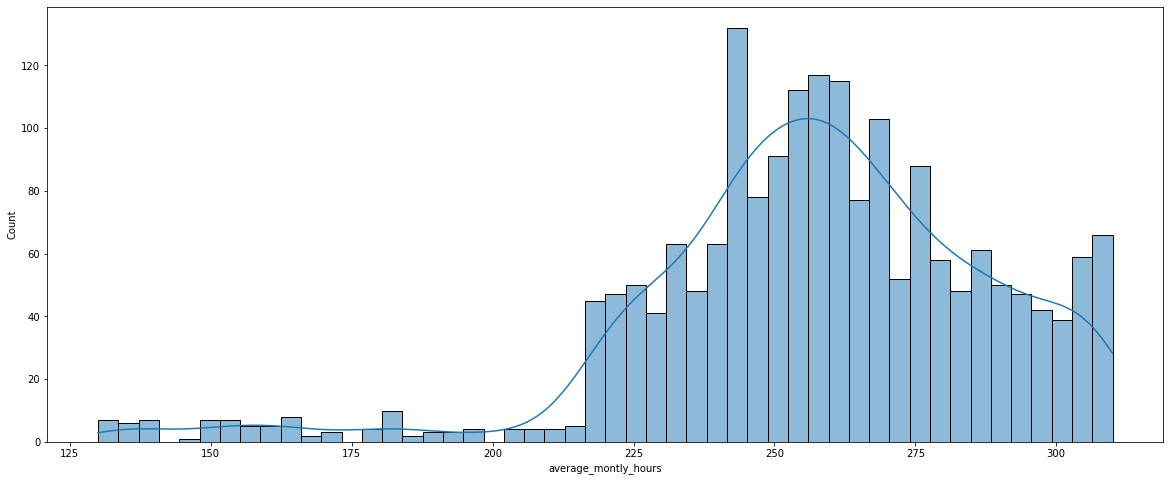

In [21]:
# Average hrs monthly for highly valued emps
plt.figure(figsize=(20,8))
sns.histplot(data_val_emp['average_montly_hours'], bins = 50,kde=True)
plt.show()

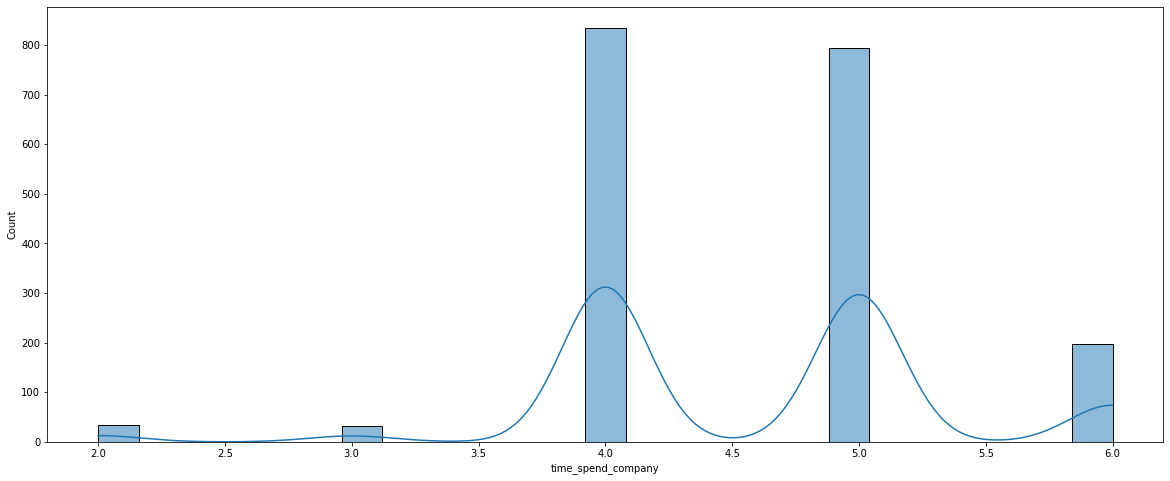

In [22]:
# time spent at the company in years for highly valued emps who left
plt.figure(figsize=(20,8))
sns.histplot(data_val_emp['time_spend_company'],kde=True)
plt.show()

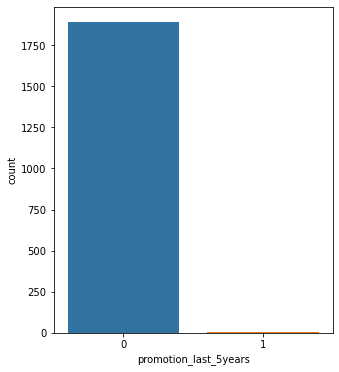

 Out of total 1893 high valued employee attrition, the 1889 employees did not receive any promotion in last 5 Years


In [23]:
# Promotion in the last five year for highly valued emps who left
plt.figure(figsize=(5,6))
sns.countplot(data_val_emp['promotion_last_5years'])
plt.show()


emp_promo = sqldf("""select promotion_last_5years as Emp_Prom_In_5Yrs, count(*) as Employee_Attrition \
from data_val_emp group by 1 order by 2 desc""")

print(f" Out of total {len(data_val_emp)} high valued employee attrition, \
the {emp_promo['Employee_Attrition'].values[0]} employees did not receive any promotion in last 5 Years")


In [24]:
(emp_promo['Employee_Attrition'].values[0])

1889

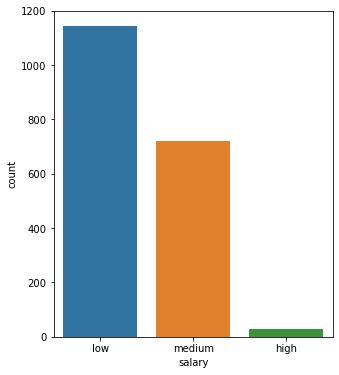

Total attrition of High Valued Employees based on the Salary:  *High valued employees: Having last_evaluation > 0.71 i.e. mean


,Emp_Salary,Employee_Attrition
0,low,1143
1,medium,722
2,high,28


In [25]:
# salary level for highly valued emps who left
plt.figure(figsize=(5,6))
sns.countplot(data = data_val_emp, x = 'salary',order = data_val_emp['salary'].value_counts().index)
plt.show()

emp_sal = sqldf("""select salary as Emp_Salary, count(*) as Employee_Attrition \
from data_val_emp group by salary order by 2 desc""")

print(f'Total attrition of High Valued Employees based on the Salary:  *High valued employees: Having last_evaluation > 0.71 i.e. mean')
display(emp_sal)

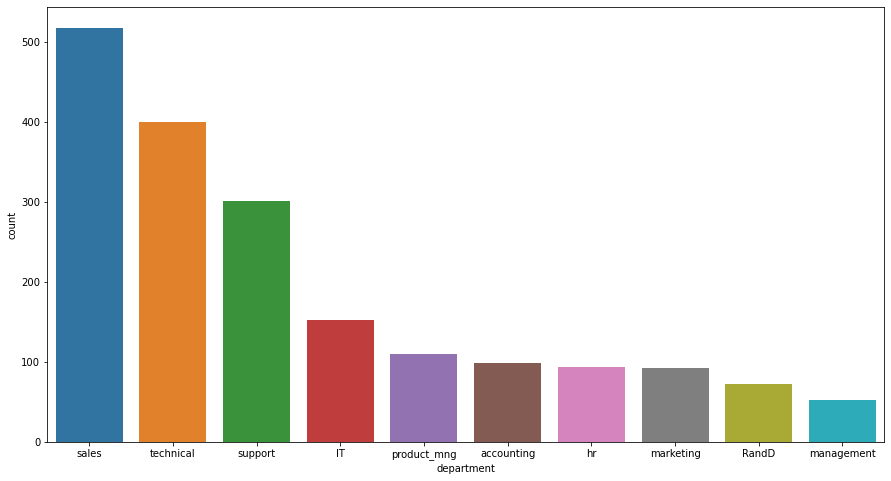

Top 3 departments for higher attrition (in terms of numbers):


,Dept_Name,Employee_Attrition
0,sales,518
1,technical,400
2,support,301


In [26]:
# department by the highly valued emps that left
plt.figure(figsize=(15,8))
sns.countplot(data=data_val_emp,x='department',order = data_val_emp['department'].value_counts().index)
plt.show()

top_3_depart = sqldf("""select department as Dept_Name, count(*) as Employee_Attrition \
from data_val_emp group by department order by 2 desc limit 3""")

print(f'Top 3 departments for higher attrition (in terms of numbers):')
display(top_3_depart)

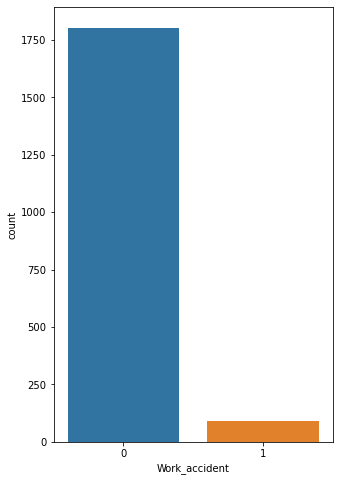

Employee attrition due work accident from the total valued employees who left: 4.75 %


In [27]:
# work accident by the highly valued emps that left
plt.figure(figsize=(5,8))
sns.countplot(data=data_val_emp,x='Work_accident')
plt.show()
d = sqldf("""select count(*) from data_val_emp where Work_accident =1""")
print(f'Employee attrition due work accident from the total valued \
employees who left: {(100*(int(d.loc[0])/len(data_val_emp))):.2f} %')

#### Summary 

Problems/pain points with the valuable or highly evaluated employees who left the organization

- They have **lower satisfaction level**
- They are working on **more number of projects**
- They have **higher monthly hours i.e. Overworked**
- They have also **spent more time in company** (mostly in the **range of 4 to 6 years** at the organization)
- They lie in the **range of lower to medium salary**
- They have **not been promoted in the last 5 years**

## [3] Machine Learning

### [3.1] Data Preparation

- Spliting the dataset into two parts i.e. employee left (**data_left**) and employee retention (**data_reten**)

- Once done with the segregation : manually sample train and test sets from the two part and then combine them to get a better sampled and well representation of the overall dataset

- Performed **manual sampling beacuse of the dataset class imbalance**

In [28]:
# Segregating based on the class
data_left = data[data['left']==1]  #Attrition
data_reten = data[data['left']==0] # Retention


data_left_70 = data_left.sample(frac = 0.7,random_state = 123)
data_left_30 = data_left[~data_left.index.isin(data_left_70.index)]

data_reten_70 = data_reten.sample(frac = 0.7, random_state = 123)
data_reten_30 = data_reten[~data_reten.index.isin(data_reten_70.index)]

# Train Test Split
#(70-30 split between train - test)

#training set
X_train = pd.concat([data_left_70,data_reten_70],axis=0)
X_train.reset_index(inplace =True,drop=True)

#training set target values
y_train = X_train['left']

#drop left feature from the X_train set
X_train.drop(['left'],axis =1,inplace=True)

#test set
X_test = pd.concat([data_left_30,data_reten_30],axis =0)
X_test.reset_index(inplace=True,drop=True)

#test set target variable values
y_test = X_test['left']

#drop left feature from X_test set
X_test.drop(['left'],axis =1,inplace=True)


The Training set Distribution


<Figure size 1080x720 with 0 Axes>

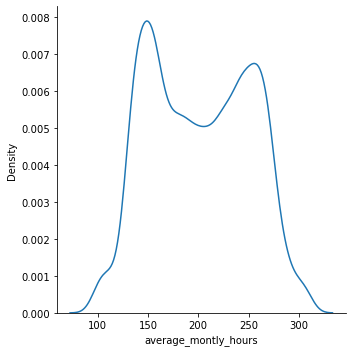

In [50]:
# Checking train test distribution
print('The Training set Distribution')
plt.figure(figsize=(15,10))
sns.displot(data=X_train, x= 'average_montly_hours', kind='kde')




The Test set Distribution


<Figure size 1080x720 with 0 Axes>

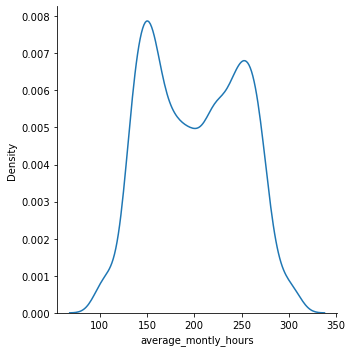

In [51]:
print('The Test set Distribution')
plt.figure(figsize=(15,10))
sns.displot(data=X_test, x= 'average_montly_hours', kind='kde')


### [3.2] Feature Importance
- Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

- There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores.

- In this case I will be using **Random Forest Feature Importance** to identify which feature in our dataset has major  influence in predicting the employee attrition.

Feature: 0, Score: 0.30190
Feature: 1, Score: 0.13427
Feature: 2, Score: 0.18857
Feature: 3, Score: 0.16406
Feature: 4, Score: 0.18881
Feature: 5, Score: 0.00957
Feature: 6, Score: 0.00155
Feature: 7, Score: 0.01127


<AxesSubplot:xlabel='features'>

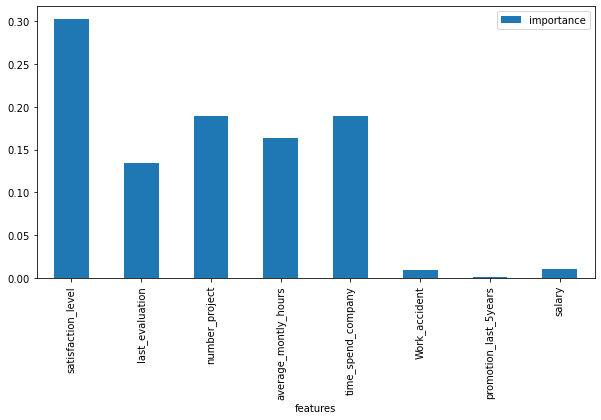

In [29]:

#drop department variable
X_train_fi = X_train.copy()
X_train_fi.drop(['department'],axis=1,inplace=True)

X_test_fi = X_test.copy()
X_test_fi.drop(['department'],axis=1,inplace=True)

#encode salary variable
map_salary = {'low': 0, 'medium': 1, 'high': 2} 
X_train_fi.replace({'salary': map_salary}, inplace=True)
X_test_fi.replace({'salary': map_salary}, inplace=True)

# define the model
model_fi = RandomForestClassifier()
# fit the model
model_fi.fit(X_train_fi, y_train)

# get importance
importance = model_fi.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


all_features = X_train_fi.columns

model_coef = list(model_fi.feature_importances_)

d = {'features':all_features,'importance':model_coef}


df_features = pd.DataFrame(d)
df_features.plot.bar(x='features',figsize=(10,5))


### [3.3] Model Building and Model Selection

In [36]:
# Check best Algorithms score for further analysis
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
seed = 123

# evaluate each model in turn
results = []
names = []

print('Cross Val Scores')
for name, model in models:
    kfold = KFold(n_splits=10)
    
    cv_results = cross_val_score(model, X_train_fi, y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('-'*30)
    
# Here I took balanced_accuracy as the measure of evaluation as there is Class Imbalance in the dataset

Cross Val Scores
LR: 0.732685 (0.301046)
------------------------------
NB: 0.761031 (0.041797)
------------------------------
KNN: 0.939346 (0.014432)
------------------------------
SVM: 0.750851 (0.400762)
------------------------------
CART: 0.969810 (0.011269)
------------------------------
RF: 0.986202 (0.018123)
------------------------------
GBM: 0.974648 (0.024274)
------------------------------


### [3.3.1] Algorrithms Comparisons

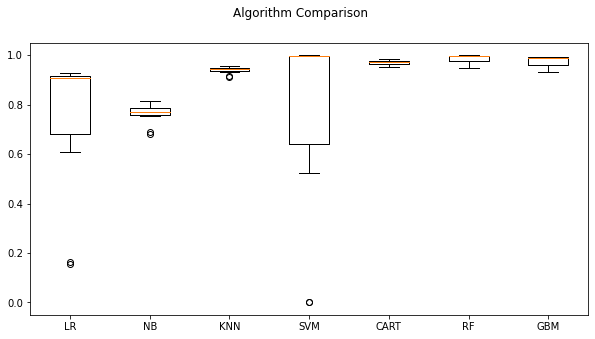

In [31]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Summary
- The KNN and Tree based models performed best compared to the other classical ML models
- There is very less variation in the scoring metric i.e. accuracy for the KNN and the Tree based models compared to other models


### [3.4] Final Model Tuning and Selection
- Based on the above study, it was found that the KNN and Tree based models i.e. Decission Tree and Random Forest are performing best given the features and dataset
- Moving forward I will be working on selecting best parameter for the KNN and Decission Tree algorithms and build a classifier for our Employee Attrition problem
- For analysis our final model I will be taking **F1-Score** as the **evaluation metric** or will be more focusing on the **Recall** value due to high impact on the business i.e. The recall is a metric that **quantifies the number of correct positive predictions made out of all positive predictions that could be made by the model**.
- Recall= TP / (TP+FN)
- So if a valuable employee is planning to leave the organization and we correctly predict it in time, this will help take certain measures to understand his/her pain points to retain

## [3.4.1] KNN

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best param: {'n_neighbors': 3}
Train Accuracy: 95.06 %
Test Accuracy: 94.73 %
Precision: 86.07 %
Recall: 92.90 %
F1 Score: 89.36 %


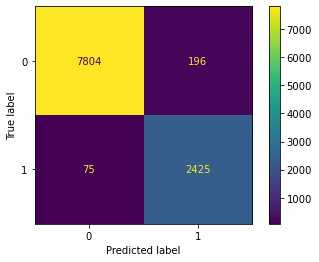

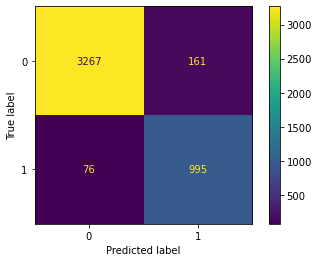

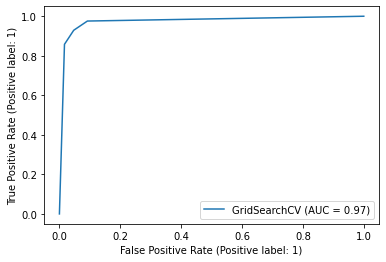

In [32]:
# Hyperparameter tuning for KNN for n_neighbors
model_Knn = KNeighborsClassifier()
k_range = list(range(3,15,2))

param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(model_Knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_fi, y_train)

#Best param
print('Best param:',grid_search.best_params_)

#train accuracy
train_accuracy = grid_search.best_score_ *100
#print("Accuracy for our training dataset with tuning is : {:.2f}%".format(train_accuracy) )

#Checking Accuracy on Test Data

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_fi, y_train)

y_test_hat = knn.predict(X_test_fi) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

#print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

#Plotting a Confusion Matrix  for train set

plot_confusion_matrix(grid,X_train_fi, y_train,values_format='d' )

#Plotting a Confusion Matrix  for test set
plot_confusion_matrix(grid,X_test_fi, y_test,values_format='d' )

#ROC Curve
metrics.plot_roc_curve(grid, X_test_fi, y_test)

# calculate prediction

print('Train Accuracy: %.2f' % train_accuracy, '%')
print('Test Accuracy: %.2f' % test_accuracy, '%')

precision = precision_score(y_test, y_test_hat, average='binary')*100
print('Precision: %.2f' % precision,'%')

recall = recall_score(y_test, y_test_hat, average='binary')*100
print('Recall: %.2f' % recall,'%')

f1score = f1_score(y_test, y_test_hat, average='binary')*100
print('F1 Score: %.2f' % f1score,'%')

## [3.4.2] CART

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best param: {'criterion': 'entropy', 'max_depth': 13}
Train Accuracy: 98.09 %
Test Accuracy: 97.98 %
Precision: 96.31 %
Recall: 95.14 %
F1 Score: 95.73 %


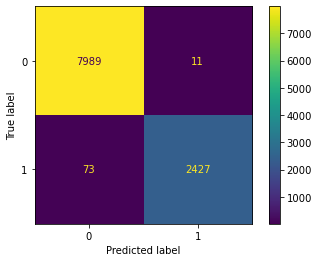

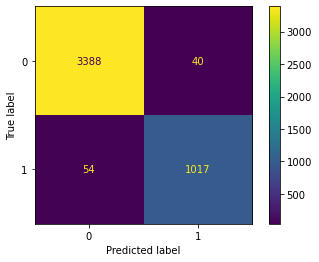

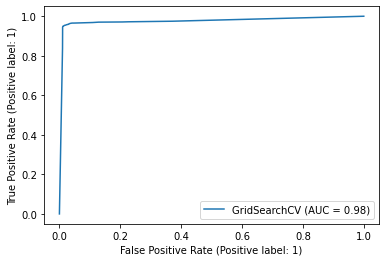

In [33]:
# Hyperparameter tuning for KNN for n_neighbors
model_CART = DecisionTreeClassifier()

# Hyper parameters range intialization for tuning 
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
  
# defining parameter range
grid = GridSearchCV(model_CART, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_fi, y_train)

#Best param
print('Best param:',grid_search.best_params_)

#train accuracy
train_accuracy = grid_search.best_score_ *100
#print("Accuracy for our training dataset with tuning is : {:.2f}%".format(train_accuracy) )

#Checking Accuracy on Test Data

CART = DecisionTreeClassifier(criterion ='entropy',max_depth=13)

CART.fit(X_train_fi, y_train)

y_test_hat = CART.predict(X_test_fi) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

#print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

#Plotting a Confusion Matrix  for train set

plot_confusion_matrix(grid,X_train_fi, y_train,values_format='d' )

#Plotting a Confusion Matrix  for test set
plot_confusion_matrix(grid,X_test_fi, y_test,values_format='d' )

#ROC Curve
metrics.plot_roc_curve(grid, X_test_fi, y_test)

# calculate prediction

print('Train Accuracy: %.2f' % train_accuracy, '%')
print('Test Accuracy: %.2f' % test_accuracy, '%')

precision = precision_score(y_test, y_test_hat, average='binary')*100
print('Precision: %.2f' % precision,'%')

recall = recall_score(y_test, y_test_hat, average='binary')*100
print('Recall: %.2f' % recall,'%')

f1score = f1_score(y_test, y_test_hat, average='binary')*100
print('F1 Score: %.2f' % f1score,'%')


-------------------------------------------------- Visualizing Decision Tree --------------------------------------------------


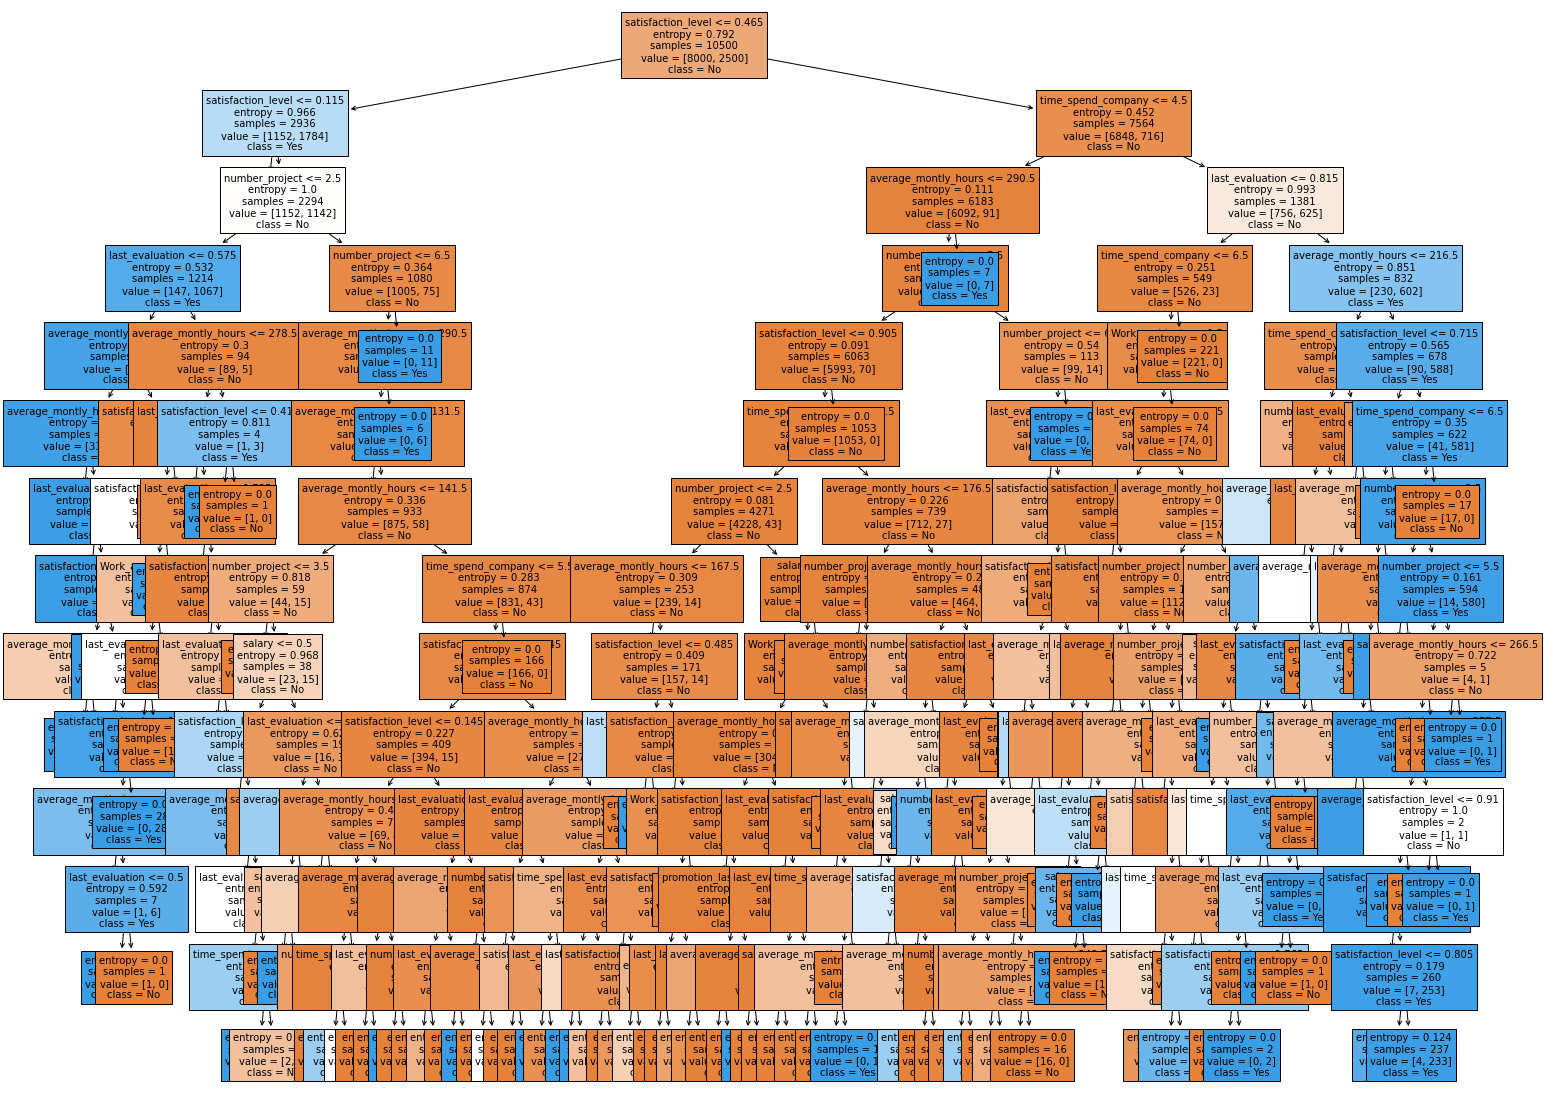

In [34]:
# Visualizing DT
fig = plt.figure(figsize=(25,20))
print('-'*50,'Visualizing Decision Tree','-'*50)
_ = tree.plot_tree(CART, 
                   feature_names=X_train_fi.columns,  
                   class_names=['No','Yes'],
                   filled=True,
                  fontsize =10)

## [4] Summary

- The final prediction model for the employee attrition that I will recommend is **Decision Tree Classifier**
#### Reasons
- The DT model is more **interpretable**
- It is **generalizing very well to the unseen data**
- It has best **F1-Score**  and **Recall** value (evaluation metric)


In [ ]:
#Further step---
# scaling features
# One-Hot Encoding Department feature
#Comparison study based on the scaled features
#Results discussion